# SAE 22
## Papot - Regnault // 3A

In [1]:
import util_TP206

In [2]:
from util_TP206 import *
from pylab import *
from sounddevice import *
from soundfile import *
from contextlib import *

### Affichage des informations du fichier et de ses deux canaux (avec spectre d'amplitude)

In [ ]:
fic = "NY_HDsample.flac"
file = read(fic)
channel1 = file[0][1]
channel2 = file[0][0]
#print(len(file[0][0]))

right, left = [], []

for i in file[0]:
    right.append(i[0])
    left.append(i[1])

ob = SoundFile('NY_HDsample.flac')

#Print des données
duree=len(file[0])/ob.samplerate
print("Durée : " + str(duree) + "s")
print("Nombre d'echantillons : " + str(len(file[0])))
print("Frequence echantillonage : " + str(ob.samplerate) + "Hz")
print("Pistes présentes : " + str(ob.channels))
print("Nombre de bits par ech. : "+ob.subtype[4:]+" bits")


#Affichage de la figure
figure(figsize=(30,10))
title("Signal")
subplot(221)
plot(left, 'r')
grid()

subplot(222)
plot(right)
grid()

subplot(223)
plotSpectreAmplitude(left, 96000)
xlim(-5000,5000)
grid()

subplot(224)
plotSpectreAmplitude(right, 96000)
xlim(-5000,5000)
grid()

Durée : 10.070322916666667s
Nombre d'echantillons : 966751
Frequence echantillonage : 96000Hz
Pistes présentes : 2
Nombre de bits par ech. : 24 bits


## Extrait d'une partie du son
>Nous avons sélectionné seulement un extrait du son dans cette fonction.
Dans cette fonction et les fonctions suivantes, nous avons séparé les channels stéréo gauche/droite avec une boucle "for", pour pouvoir les modifier.

In [4]:
fic = "NY_HDsample_mini.flac"
file = read(fic)

def extract(fic, time):
    right, left = [], []
    for i in file[0]:
        right.append(i[0])
        left.append(i[1])
    duree=len(file[0])/ob.samplerate
    echantdroit = (len(right)*time)/duree
    echantgauch = (len(left)*time)/duree
    extractdroit = right[0:int(echantdroit)]
    extractgauch = left[0:int(echantgauch)]
    #plot(left[0:int(echantdroit)])
    fichier = [extractdroit, extractgauch]
    return fichier

extrait = extract(file, 1)

#plot(extrait)
#play(extract(1), 96000)

#print(len(file[0]))
#print(extrait)
#print("Nombre d'echantillons dans l'extrait : "+str(len(extract(fic, 1.2))))

## Echantillonage
> Nous avons sélectionné un échantillon sur 2, pour passer de 96 kHz à 48 kHz (soit de l'HD au SD).

In [6]:
fic = "NY_HDsample_mini.flac"
file = read(fic)


def freqinf(file, freq):
    right = file[0]
    left = file[1]
    rightech = right[::freq]
    leftech = left[::freq]
    return [rightech, leftech]
#result = freqinf(file, 2)
#print(len(result))

## Quantification inférieure
>Dans cette fonction, nous avons quantifié (uniformément) l'audio à un signal inférieur.

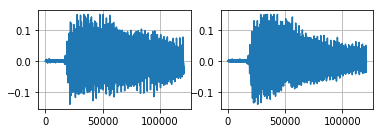

In [7]:

right, left = [], []

for i in file[0]:
    right.append(i[0])
    left.append(i[1])
    
def quantif_inf(nmin, nmax, right, left):
    right = uniform_quantizer(right, 2**16, nmin, nmax)
    left = uniform_quantizer(left, 2**16, nmin, nmax)
    new = [right, left]
    return new
newnew = quantif_inf(-0.15,0.15,right,left)
subplot(221)
plot(newnew[0][0])
grid()

subplot(222)
plot(newnew[1][0])
grid()

## Fonction finale
> Voici la fonction finale, qui convertit un fichier SD en un fichier HD. Elle prend en argument le nom du fichier à convertir et le temps qu'elle doit en extraire.

Fichier SD généré


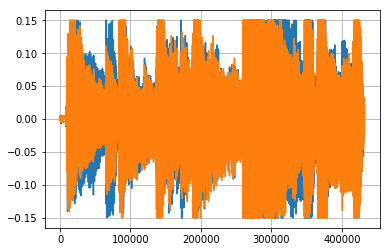

In [35]:
fic = "NY_HDsample.flac"
file = read(fic)

def HDtoSD(fic, t):
    file = read(fic)
    extrait = extract(file, t)
    extrait = freqinf(extrait, 2)
    extrait = quantif_inf(-0.15, 0.15, extrait[0], extrait[1])
    tab = []
    for i in range(len(extrait[0][0])):
        tab.append([extrait[0][0][i],extrait[1][0][i]])
    with SoundFile('new_sample.flac', 'w', 48000, 2, 'PCM_24') as f:
        f.write(tab)
    print('Fichier SD généré')    
    return tab
    
res = HDtoSD(fic, 9)
#print(res)
#print(fic)
#print(res)

#subplot(221)
plot(res)
grid()

#subplot(222)
#plot(res[1][0])
#grid()

## Conclusion

>Nous entendons quelques différences entre la version SD et la version HD, les graves sont notamment saturées (visible sur le spectre et à l'écoute).